In [4]:
import pandas as pd
import numpy as np
 
from statsmodels.api import OLS, add_constant
import pandas_datareader.data as web
 
from linearmodels.asset_pricing import LinearFactorModel
 
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# 2000~2020 월별 수익률
ff_factor = 'F-F_Research_Data_5_Factors_2x3'
ff_factor_data = web.DataReader(ff_factor, 'famafrench', start='2000', end='2020-12')[0]
ff_factor_data

Mkt-RF    SMB   HML    RMW   CMA    RF
Date                                           
2000-01   -4.74   4.44 -1.91  -6.31  4.75  0.41
2000-02    2.45  18.34 -9.70 -18.73 -0.36  0.43
2000-03    5.20 -15.35  8.17  11.82 -1.65  0.47
2000-04   -6.40  -5.01  7.26   7.66  5.65  0.46
2000-05   -4.42  -3.84  4.81   4.17  1.30  0.50
...         ...    ...   ...    ...   ...   ...
2020-08    7.63  -0.89 -2.96   4.26 -1.20  0.01
2020-09   -3.63   0.01 -2.68  -1.39 -1.89  0.01
2020-10   -2.10   4.64  4.22  -0.75 -0.76  0.01
2020-11   12.47   7.12  2.13  -2.20  1.37  0.01
2020-12    4.63   4.79 -1.50  -1.99 -0.11  0.01

[252 rows x 6 columns]

In [20]:
# 17개 산업군의 월별 포트폴리오 수익률
ff_portfolio = '17_Industry_Portfolios'
ff_portfolio_data = web.DataReader(ff_portfolio, 'famafrench', start='2000', end='2020-12')[0]
ff_portfolio_data

Food   Mines  Oil    Clths  Durbl  Chems  Cnsum  Cnstr  Steel  FabPr   
Date                                                                            
2000-01  -5.21  19.95   1.79 -10.82  -8.60  -8.98   3.56 -14.88  -2.77  -9.50  \
2000-02  -9.32  -3.65  -5.20 -11.46  -4.14  -7.38 -10.13  -1.38   6.84 -11.61   
2000-03   4.94  -3.34  13.24  21.51   2.65  12.48   1.07  12.19   3.49  13.38   
2000-04   0.19 -11.33  -1.49   4.64   1.46  -4.38   8.85  -6.13  -0.84   2.17   
2000-05  13.46  -7.55  10.45  -4.72  -1.14   0.51   6.63 -10.03  -4.92  -2.42   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2020-08   4.08   4.94  -1.20  12.21   5.66   4.73   3.63   7.72   8.18   8.84   
2020-09  -1.83  -1.09 -15.34   6.29   4.47   0.29  -2.49  -0.01  -4.90  -0.18   
2020-10  -3.23   6.68  -4.69  -1.62   3.56  -0.53  -5.21  -3.55   7.11   5.79   
2020-11   9.80   7.70  28.87  14.56  14.05  13.10   7.24   6.47  18.81  15.93   
2020-12   3.56   8.37   6.07   4.86  11.85   4.77   3.63   0.07   6.28   2.76   

         Machn  Cars   Trans  Utils  Rtail  Finan  Other  
Date                                                      
2000-01   0.15  -0.35  -9.67   6.06 -12.98  -4.41  -6.77  
2000-02  20.06  -7.91  -6.14  -7.26  -6.11  -8.59   5.10  
2000-03   7.79  10.21  11.48   5.77  15.11  16.67   2.99  
2000-04  -3.53  10.36   4.89   7.60  -3.28  -3.90 -11.10  
2000-05  -9.50 -14.23  -2.07   3.90  -1.69   5.12  -7.97  
...        ...    ...    ...    ...    ...    ...    ...  
2020-08   5.60  38.72  10.39  -2.25   8.66   5.06   9.56  
2020-09  -0.72  -9.18  -0.83  -0.27  -4.43  -4.12  -4.57  
2020-10  -0.66  -3.72  -4.66   4.49  -2.55  -1.01  -2.33  
2020-11  14.10  30.55  19.68   2.63   8.42  16.40  11.37  
2020-12   4.09  15.25   1.04   0.63   1.59   6.92   4.85  

[252 rows x 17 columns]

In [22]:
# 포트폴리오 수익률 - 무위험 수익률 = 초과 수익률
ff_portfolio_data = ff_portfolio_data.sub(ff_factor_data.RF, axis=0)
 
# 무위험 수익률 변수를 제외한 5개 팩터 변수만 남김
ff_factor_data = ff_factor_data.drop('RF', axis=1)
ff_factor_data

Mkt-RF    SMB   HML    RMW   CMA
Date                                     
2000-01   -4.74   4.44 -1.91  -6.31  4.75
2000-02    2.45  18.34 -9.70 -18.73 -0.36
2000-03    5.20 -15.35  8.17  11.82 -1.65
2000-04   -6.40  -5.01  7.26   7.66  5.65
2000-05   -4.42  -3.84  4.81   4.17  1.30
...         ...    ...   ...    ...   ...
2020-08    7.63  -0.89 -2.96   4.26 -1.20
2020-09   -3.63   0.01 -2.68  -1.39 -1.89
2020-10   -2.10   4.64  4.22  -0.75 -0.76
2020-11   12.47   7.12  2.13  -2.20  1.37
2020-12    4.63   4.79 -1.50  -1.99 -0.11

[252 rows x 5 columns]

In [23]:
# Step 1: Factor Exposures
betas = []
for industry in ff_portfolio_data:
    step1 = OLS(endog=ff_portfolio_data.loc[ff_factor_data.index, industry], # 종속변수 
                exog=add_constant(ff_factor_data) # 독립변수
                ).fit()
    betas.append(step1.params.drop('const'))
 
betas = pd.DataFrame(betas, 
                     columns=ff_factor_data.columns, 
                     index=ff_portfolio_data.columns)
betas

Mkt-RF       SMB       HML       RMW       CMA
Food   0.649114 -0.099223 -0.054472  0.440870  0.393706
Mines  1.102463  0.541463 -0.056924  0.457543  0.356569
Oil    1.095350  0.266059  0.311424  0.564711  0.109333
Clths  1.125848  0.284390  0.305912  0.675822 -0.169536
Durbl  1.212647  0.489792  0.127205  0.479724  0.210831
Chems  1.228129  0.116990  0.266319  0.446653 -0.013166
Cnsum  0.683584 -0.300366 -0.184161  0.208896  0.582036
Cnstr  1.137659  0.309373  0.240432  0.356383 -0.036250
Steel  1.560063  0.428228  0.156758 -0.063254  0.013149
FabPr  1.131893  0.339776  0.086661  0.615434  0.077885
Machn  1.274370  0.051618 -0.292531 -0.498841 -0.117522
Cars   1.477381  0.341621 -0.008424  0.654842  0.322671
Trans  1.086896  0.168008  0.247214  0.541802  0.065569
Utils  0.549275 -0.125884  0.053471  0.207761  0.438682
Rtail  0.932274 -0.019494 -0.105887  0.484414  0.085344
Finan  1.039008 -0.157537  0.841759 -0.164446 -0.233324
Other  1.037404 -0.040250 -0.168876 -0.128738 -0.102806

In [11]:
betas

Mkt-RF       SMB       HML       RMW       CMA
Food   0.649114 -0.099223 -0.054472  0.440870  0.393706
Mines  1.102463  0.541463 -0.056924  0.457543  0.356569
Oil    1.095350  0.266059  0.311424  0.564711  0.109333
Clths  1.125848  0.284390  0.305912  0.675822 -0.169536
Durbl  1.212647  0.489792  0.127205  0.479724  0.210831
Chems  1.228129  0.116990  0.266319  0.446653 -0.013166
Cnsum  0.683584 -0.300366 -0.184161  0.208896  0.582036
Cnstr  1.137659  0.309373  0.240432  0.356383 -0.036250
Steel  1.560063  0.428228  0.156758 -0.063254  0.013149
FabPr  1.131893  0.339776  0.086661  0.615434  0.077885
Machn  1.274370  0.051618 -0.292531 -0.498841 -0.117522
Cars   1.477381  0.341621 -0.008424  0.654842  0.322671
Trans  1.086896  0.168008  0.247214  0.541802  0.065569
Utils  0.549275 -0.125884  0.053471  0.207761  0.438682
Rtail  0.932274 -0.019494 -0.105887  0.484414  0.085344
Finan  1.039008 -0.157537  0.841759 -0.164446 -0.233324
Other  1.037404 -0.040250 -0.168876 -0.128738 -0.102806

In [24]:
# Step 2: Risk Premia
lambdas = []
for period in ff_portfolio_data.index:
    step2 = OLS(endog=ff_portfolio_data.loc[period, betas.index], # 종속변수
                exog=betas # 독립변수
                ).fit()
    lambdas.append(step2.params)
 
lambdas = pd.DataFrame(lambdas, 
                       index=ff_portfolio_data.index,
                       columns=betas.columns.tolist())
lambdas

Mkt-RF        SMB        HML        RMW        CMA
Date                                                          
2000-01  -5.522062  18.636327   6.585350 -17.189035  30.875474
2000-02   1.717988  12.056195 -13.655835 -18.562322  -8.167253
2000-03   7.864583 -18.582619   3.492030  15.383784 -20.370898
2000-04  -2.357880  -4.868743   2.949770   4.696622   9.075303
2000-05  -3.650196 -12.939830  14.237473   2.114628  13.428136
...            ...        ...        ...        ...        ...
2020-08   7.394438  -1.729899  -9.752064   8.755187  -7.626075
2020-09  -2.488287   2.879278  -2.112483   1.587829  -4.585651
2020-10  -1.498566  14.132397   3.192364  -7.212701   7.426308
2020-11  12.034806  -1.749073   4.768715   4.362824  -0.813582
2020-12   3.709153   5.940108   2.881117  -2.548484   7.275829

[252 rows x 5 columns]

In [25]:
lambdas

Mkt-RF        SMB        HML        RMW        CMA
Date                                                          
2000-01  -5.522062  18.636327   6.585350 -17.189035  30.875474
2000-02   1.717988  12.056195 -13.655835 -18.562322  -8.167253
2000-03   7.864583 -18.582619   3.492030  15.383784 -20.370898
2000-04  -2.357880  -4.868743   2.949770   4.696622   9.075303
2000-05  -3.650196 -12.939830  14.237473   2.114628  13.428136
...            ...        ...        ...        ...        ...
2020-08   7.394438  -1.729899  -9.752064   8.755187  -7.626075
2020-09  -2.488287   2.879278  -2.112483   1.587829  -4.585651
2020-10  -1.498566  14.132397   3.192364  -7.212701   7.426308
2020-11  12.034806  -1.749073   4.768715   4.362824  -0.813582
2020-12   3.709153   5.940108   2.881117  -2.548484   7.275829

[252 rows x 5 columns]

In [26]:
lambdas.mean()

Mkt-RF    0.575996
SMB      -0.533166
HML      -0.159854
RMW       0.600912
CMA      -0.041279
dtype: float64

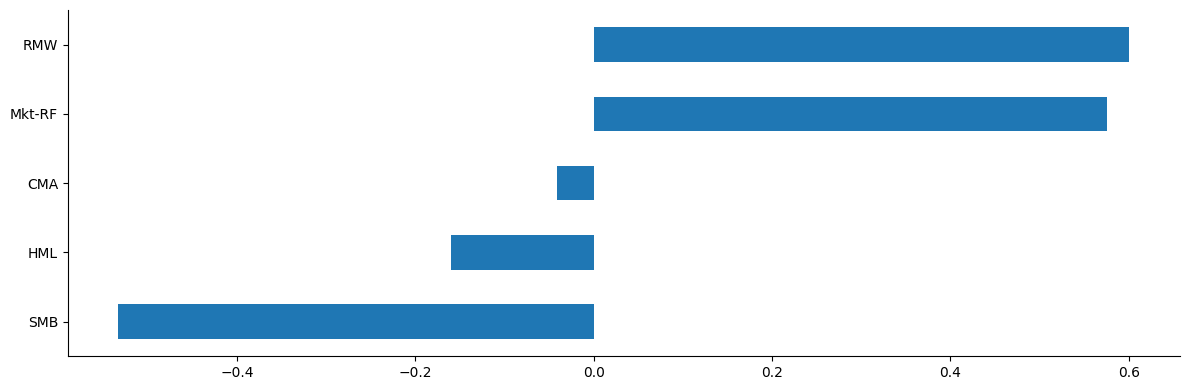

In [27]:
lambdas.mean().sort_values().plot.barh(figsize=(12, 4))
sns.despine()
plt.tight_layout();

In [16]:
t = lambdas.mean().div(lambdas.std())
t

Mkt-RF    0.123793
SMB      -0.074678
HML      -0.034542
RMW       0.121427
CMA      -0.006180
dtype: float64

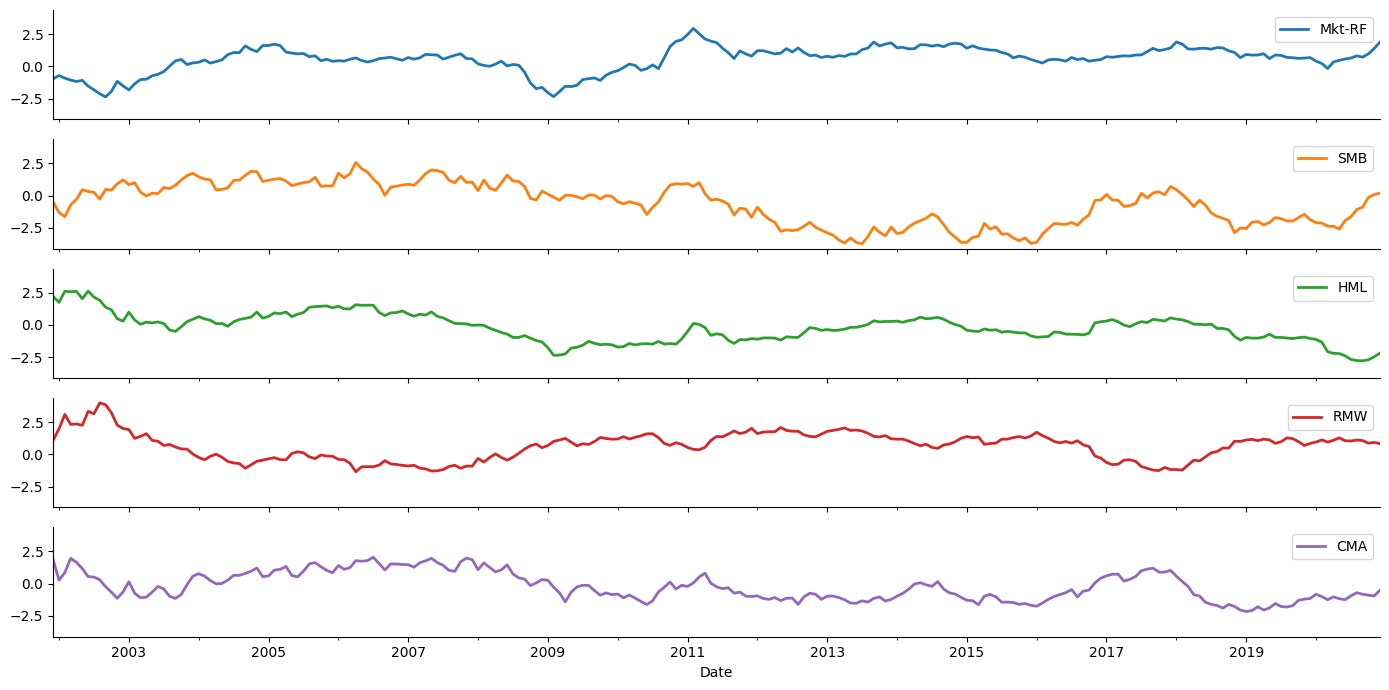

In [17]:
window = 24  # months
lambdas.rolling(window).mean().dropna().plot(lw=2,
                                             figsize=(14, 7),
                                             subplots=True,
                                             sharey=True)
sns.despine()
plt.tight_layout()

In [18]:
mod = LinearFactorModel(portfolios=ff_portfolio_data, 
                        factors=ff_factor_data)
res = mod.fit()
print(res)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6827
No. Factors:                          5   J-statistic:                    12.912
No. Observations:                   252   P-value                         0.3755
Date:                  Fri, May 26 2023   Distribution:                 chi2(12)
Time:                          15:28:22                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.5760     0.3016     1.9101     0.0561     -0.0151      1.1670
SMB           -0.5332     0.5276    

In [19]:
print(res.full_summary)

                      LinearFactorModel Estimation Summary                      
No. Test Portfolios:                 17   R-squared:                      0.6827
No. Factors:                          5   J-statistic:                    12.912
No. Observations:                   252   P-value                         0.3755
Date:                  Fri, May 26 2023   Distribution:                 chi2(12)
Time:                          15:28:22                                         
Cov. Estimator:                  robust                                         
                                                                                
                            Risk Premia Estimates                             
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Mkt-RF         0.5760     0.3016     1.9101     0.0561     -0.0151      1.1670
SMB           -0.5332     0.5276    